In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df = pd.read_csv('/Users/swapnaneeldey/Desktop/MATH392/MATH-392-Intro-to-neural-networks/midterm/data/presidential_election_dataset.csv')
df_description = pd.read_csv('/Users/swapnaneeldey/Desktop/MATH392/MATH-392-Intro-to-neural-networks/midterm/data/data_dictionary.csv')

In [62]:
df_description["category"]

0                year
1                  id
2                  id
3                  id
4      Persons: total
            ...      
174            target
175            target
176            target
177            target
178              area
Name: category, Length: 179, dtype: object

In [63]:
df

year   gisjoin    state             county  land_area_sqkm  \
0      2008  G0100010  Alabama     Autauga County     1565.309074   
1      2008  G0100030  Alabama     Baldwin County     5250.611951   
2      2008  G0100050  Alabama     Barbour County     2342.683550   
3      2008  G0100070  Alabama        Bibb County     1621.761112   
4      2008  G0100090  Alabama      Blount County     1685.119450   
...     ...       ...      ...                ...             ...   
12407  2020  G5600370  Wyoming  Sweetwater County    27171.988311   
12408  2020  G5600390  Wyoming       Teton County    10922.649458   
12409  2020  G5600410  Wyoming       Uinta County     5408.258287   
12410  2020  G5600430  Wyoming    Washakie County     5808.569009   
12411  2020  G5600450  Wyoming      Weston County     6216.030056   

       persons_total  persons_below_poverty  persons_hispanic  persons_male  \
0              53155                   5623              1233         25780   
1             175791                  21216              6848         85902   
2              27699                   6203              1273         14652   
3              22610                   2830               134         12162   
4              56692                   7510              4246         28080   
...              ...                    ...               ...           ...   
12407          42079                   4833              6820         21793   
12408          23346                   1606              3548         12114   
12409          20546                   1315              2025         10446   
12410           7725                    503              1103          4045   
12411           6870                    830               243          3718   

       persons_female  ...  households_income_under_10k  \
0               27375  ...                         1316   
1               89889  ...                         4146   
2               13047  ...                         1695   
3               10448  ...                          547   
4               28612  ...                         1742   
...               ...  ...                          ...   
12407           20286  ...                          852   
12408           11232  ...                          181   
12409           10100  ...                          154   
12410            3680  ...                          128   
12411            3152  ...                          207   

       households_income_10k_15k  households_income_15k_25k  \
0                            996                       1724   
1                           3353                       8252   
2                            964                       1370   
3                            547                       1127   
4                           1240                       2681   
...                          ...                        ...   
12407                        463                       1090   
12408                        202                        569   
12409                        251                        399   
12410                        110                        365   
12411                        150                        141   

       households_income_25k_plus  median_household_income  per_capita_income  \
0                           15682                    53255              24568   
1                           53725                    50147              26469   
2                            5766                    33219              15875   
3                            5220                    41770              19918   
4                           14942                    45549              21070   
...                           ...                      ...                ...   
12407                       13930                    79375              40268   
12408                        8693                   108279              76296   
12409                        6782 

In [64]:
df_description.head()

# # run the next line to see the types of columns
df_description.groupby('category').size()

category
Persons: total            1
area                      1
ethnicity                 1
household                 5
id                        3
income                    2
labor force               6
nativity                  2
poverty                   1
sex                       2
sex ~ age ~ education    70
sex ~ age ~ race         70
sex ~ marital status     10
target                    4
year                      1
dtype: int64

In [65]:
sum(df["households_income_under_10k"])

30117638

In [66]:
# group features by category for easier access
idx = df_description[df_description['category'] == 'id']['feature'].values.tolist()
sex_age_edus = df_description[df_description['category'] == 'sex ~ age ~ education']['feature'].values.tolist()
sex_age_races = df_description[df_description['category'] == 'sex ~ age ~ race']['feature'].values.tolist()
sex_maritals = df_description[df_description['category'] == 'sex ~ marital status']['feature'].values.tolist()
households = df_description[df_description['category'] == 'household']['feature'].values.tolist()
labors = df_description[df_description['category'] == 'labor force']['feature'].values.tolist()
nativities = df_description[df_description['category'] == 'nativity']['feature'].values.tolist()
sexes = df_description[df_description['category'] == 'sex']['feature'].values.tolist()
incomes = df_description[df_description['category'] == 'income']['feature'].values.tolist()
targets = df_description[df_description['category'] == 'target']['feature'].values.tolist()

# combine all the lists into one
combined_list = sex_age_edus + sex_age_races + sex_maritals + targets + households + labors + nativities + sexes + incomes + idx

# all other columns
misc = list(set(df.columns) - set(combined_list))

In [67]:
combined_list

['male_18_24_less_than_9th',
 'male_18_24_some_hs',
 'male_18_24_hs_grad',
 'male_18_24_some_college',
 'male_18_24_associates',
 'male_18_24_bachelors',
 'male_18_24_graduate',
 'male_25_34_less_than_9th',
 'male_25_34_some_hs',
 'male_25_34_hs_grad',
 'male_25_34_some_college',
 'male_25_34_associates',
 'male_25_34_bachelors',
 'male_25_34_graduate',
 'male_35_44_less_than_9th',
 'male_35_44_some_hs',
 'male_35_44_hs_grad',
 'male_35_44_some_college',
 'male_35_44_associates',
 'male_35_44_bachelors',
 'male_35_44_graduate',
 'male_45_64_less_than_9th',
 'male_45_64_some_hs',
 'male_45_64_hs_grad',
 'male_45_64_some_college',
 'male_45_64_associates',
 'male_45_64_bachelors',
 'male_45_64_graduate',
 'male_65plus_less_than_9th',
 'male_65plus_some_hs',
 'male_65plus_hs_grad',
 'male_65plus_some_college',
 'male_65plus_associates',
 'male_65plus_bachelors',
 'male_65plus_graduate',
 'female_18_24_less_than_9th',
 'female_18_24_some_hs',
 'female_18_24_hs_grad',
 'female_18_24_some_co

In [68]:
# sum all the votes in each feature
def sum_votes(df, features):
    return df[features].sum(axis=1)
# print the sum of all the votes
tot_vot = {}
for feature in combined_list:
    if feature in targets:
        continue
    else:
        if type(sum_votes(df, [feature]).sum()) == np.int64:
            tot_vot[feature] = sum_votes(df, [feature]).sum()
tot_vot = sorted(tot_vot.items(), key=lambda x: x[1], reverse=True)
# print the top 10 features
print("Top 50 features with the most votes:")
for feature, votes in tot_vot[:50]:
    print(f"{feature}: {votes}")





Top 50 features with the most votes:
persons_native: 1089071424
labor_force_total: 637612613
persons_female: 636571350
median_household_income: 636008033
labor_force_civilian: 627340665
persons_male: 618938315
labor_force_employed: 588774107
households_total: 469634919
households_income_25k_plus: 372792964
not_in_labor_force: 360729054
per_capita_income: 331294601
male_married: 258446633
female_married: 255522040
male_never_married: 178044018
persons_foreign_born: 166438241
female_never_married: 154451731
female_45_64_white: 123909924
male_45_64_white: 121263697
female_65plus_white: 70934128
female_divorced: 62340717
male_65plus_white: 60241978
male_25_34_white: 58570522
male_35_44_white: 57682059
female_25_34_white: 56651074
female_35_44_white: 56541561
female_widowed: 46782972
male_divorced: 46754300
male_45_64_hs_grad: 46301359
female_45_64_hs_grad: 45265649
labor_force_unemployed: 44492445
households_income_15k_25k: 44231088
male_18_24_white: 41837949
female_18_24_white: 39716384
f

In [69]:
top_50 = [feature for feature, votes in tot_vot[:50]]
#normalize the top_50 data
df_top_50 = df[top_50]
for feature in top_50:
    df_top_50[feature] = df_top_50[feature] / df_top_50[feature].sum()
df_top_50

/var/folders/km/7nz8l5dn7wn9ld1xzqkw5v400000gn/T/ipykernel_56100/406750725.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_50[feature] = df_top_50[feature] / df_top_50[feature].sum()


persons_native  labor_force_total  persons_female  \
0            0.000048           0.000042        0.000043   
1            0.000156           0.000132        0.000141   
2            0.000025           0.000017        0.000020   
3            0.000021           0.000017        0.000016   
4            0.000050           0.000042        0.000045   
...               ...                ...             ...   
12407        0.000036           0.000035        0.000032   
12408        0.000019           0.000024        0.000018   
12409        0.000018           0.000016        0.000016   
12410        0.000007           0.000006        0.000006   
12411        0.000006           0.000005        0.000005   

       median_household_income  labor_force_civilian  persons_male  \
0                     0.000084              0.000040      0.000042   
1                     0.000079              0.000128      0.000139   
2                     0.000052              0.000017      0.000024   
3                     0.000066              0.000017      0.000020   
4                     0.000072              0.000041      0.000045   
...                        ...                   ...           ...   
12407                 0.000125              0.000035      0.000035   
12408                 0.000170              0.000025      0.000020   
12409                 0.000123              0.000016      0.000017   
12410                 0.000097              0.000006      0.000007   
12411                 0.000113              0.000005      0.000006   

       labor_force_employed  households_total  households_income_25k_plus  \
0                  0.000041          0.000042                    0.000042   
1                  0.000133          0.000148                    0.000144   
2                  0.000017          0.000021                    0.000015   
3                  0.000017          0.000016                    0.000014   
4                  0.000042          0.000044                    0.000040   
...                     ...               ...                         ...   
12407              0.000036          0.000035                    0.000037   
12408              0.000026          0.000021                    0.000023   
12409              0.000016          0.000016                    0.000018   
12410              0.000007          0.000007                    0.000008   
12411              0.000005          0.000006                    0.000006   

       not_in_labor_force  ...  male_25_34_hs_grad  male_18_24_some_college  \
0                0.000038  ...            0.000049             2.904357e-05   
1                0.000154  ...            0.000126             7.583843e-05   
2                0.000031  ...            0.000036             1.010593e-05   
3                0.000020  ...            0.000032             5.492355e-06   
4                0.000049  ...            0.000047             2.566028e-05   
...                   ...  ...                 ...                      ...   
12407            0.000029  ...            0.000045             2.680269e-05   
12408            0.000012  ...            0.000015             1.362104e-05   
12409            0.000015  ...            0.000020             1.168773e-05   
12410            0.000006  ...            0.000004             5.228722e-06   
12411            0.000007  ...            0.000006             9.227156e-07   

       male_65plus_hs_grad  households_income_10k_15k  male_35_44_hs_grad  \
0                 0.000042                   0.000044            0.000061   
1                 0.000178                   0.000149            0.000168   
2                 0.000018                   0.000043            0.000045   
3                 0.000017                   0.000024            0.000044   
4                 0.000058                   0.000055            0.000076   
...                    ...                        ...                 ...   
12407             0.000047      

In [70]:
top_8 = ["persons_native", "persons_female", "persons_male", "median_household_income", "female_25_34_bachelors", "male_25_34_bachelors", "labor_force_employed", "not_in_labor_force" ]

In [71]:
df_top_50.columns[:10]

Index(['persons_native', 'labor_force_total', 'persons_female',
       'median_household_income', 'labor_force_civilian', 'persons_male',
       'labor_force_employed', 'households_total',
       'households_income_25k_plus', 'not_in_labor_force'],
      dtype='object')

In [72]:
first_10 = df_top_50.columns[:10]
second_10 = df_top_50.columns[10:20]
third_10 = df_top_50.columns[20:30]
fourth_10 = df_top_50.columns[30:40]
fifth_10 = df_top_50.columns[40:50]

In [73]:
first_10  

Index(['persons_native', 'labor_force_total', 'persons_female',
       'median_household_income', 'labor_force_civilian', 'persons_male',
       'labor_force_employed', 'households_total',
       'households_income_25k_plus', 'not_in_labor_force'],
      dtype='object')

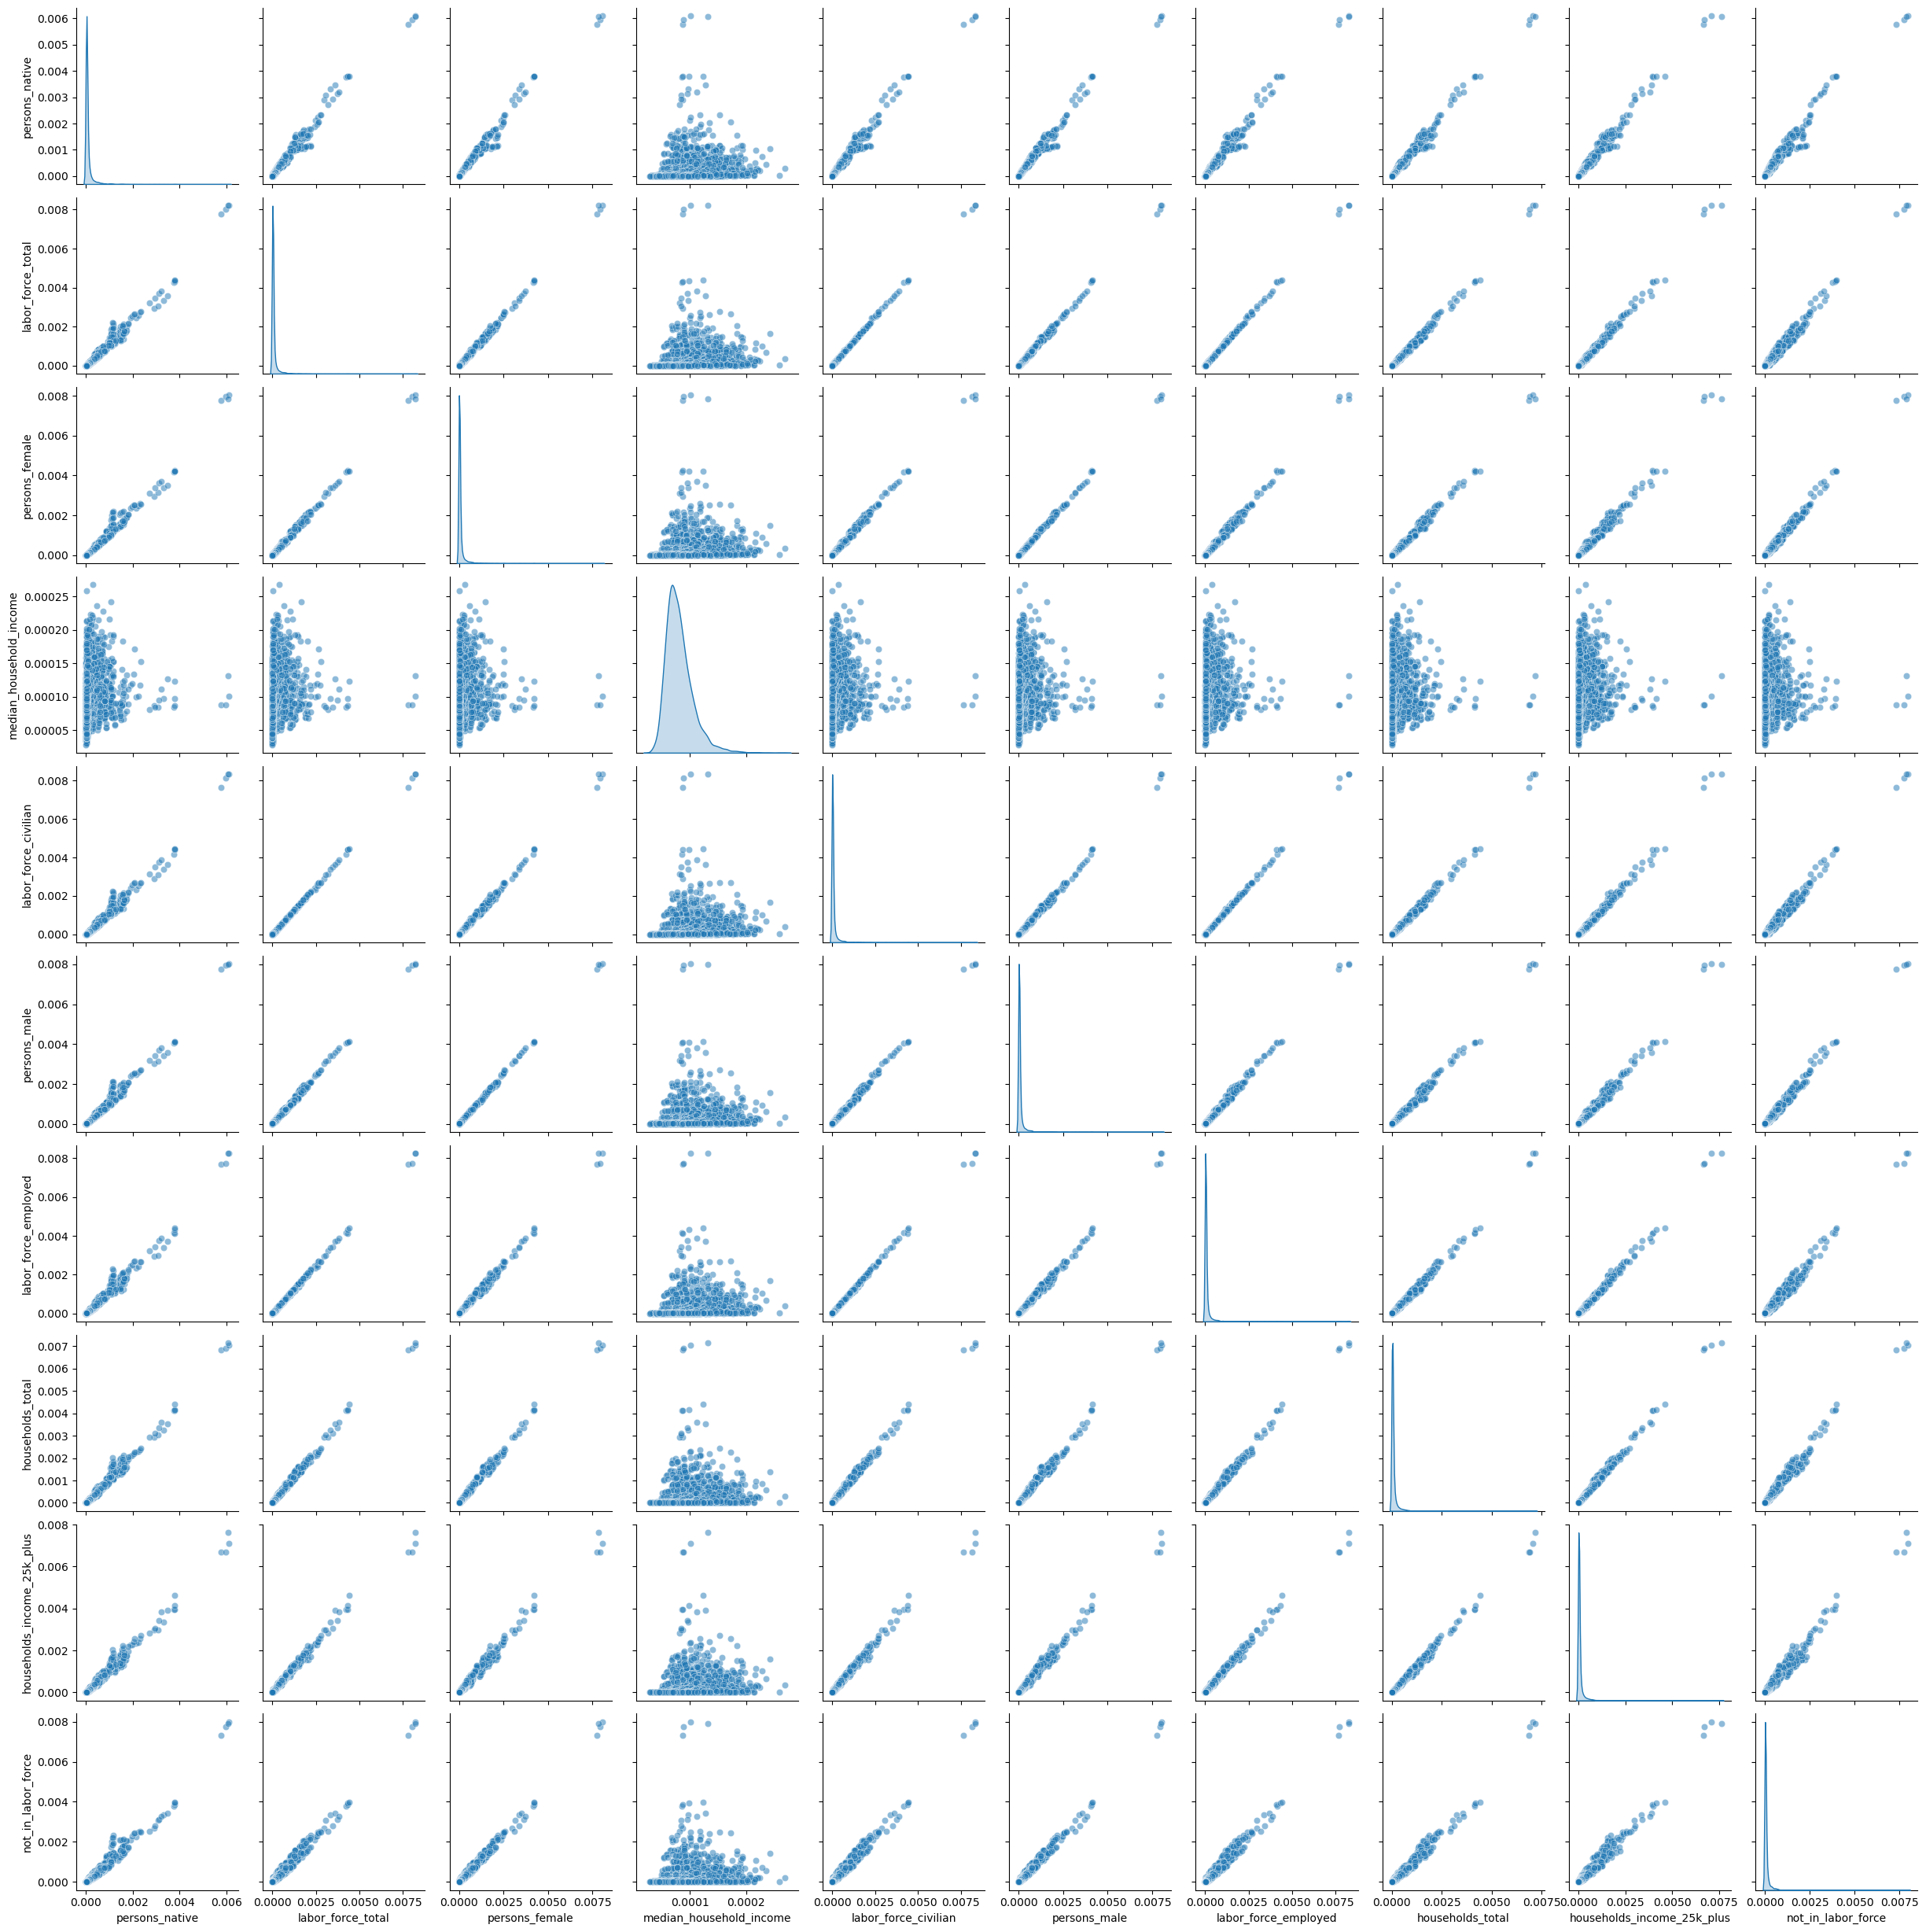

In [74]:
sns.pairplot(df_top_50[first_10], diag_kind='kde', plot_kws={'alpha': 0.5})
plt.show()

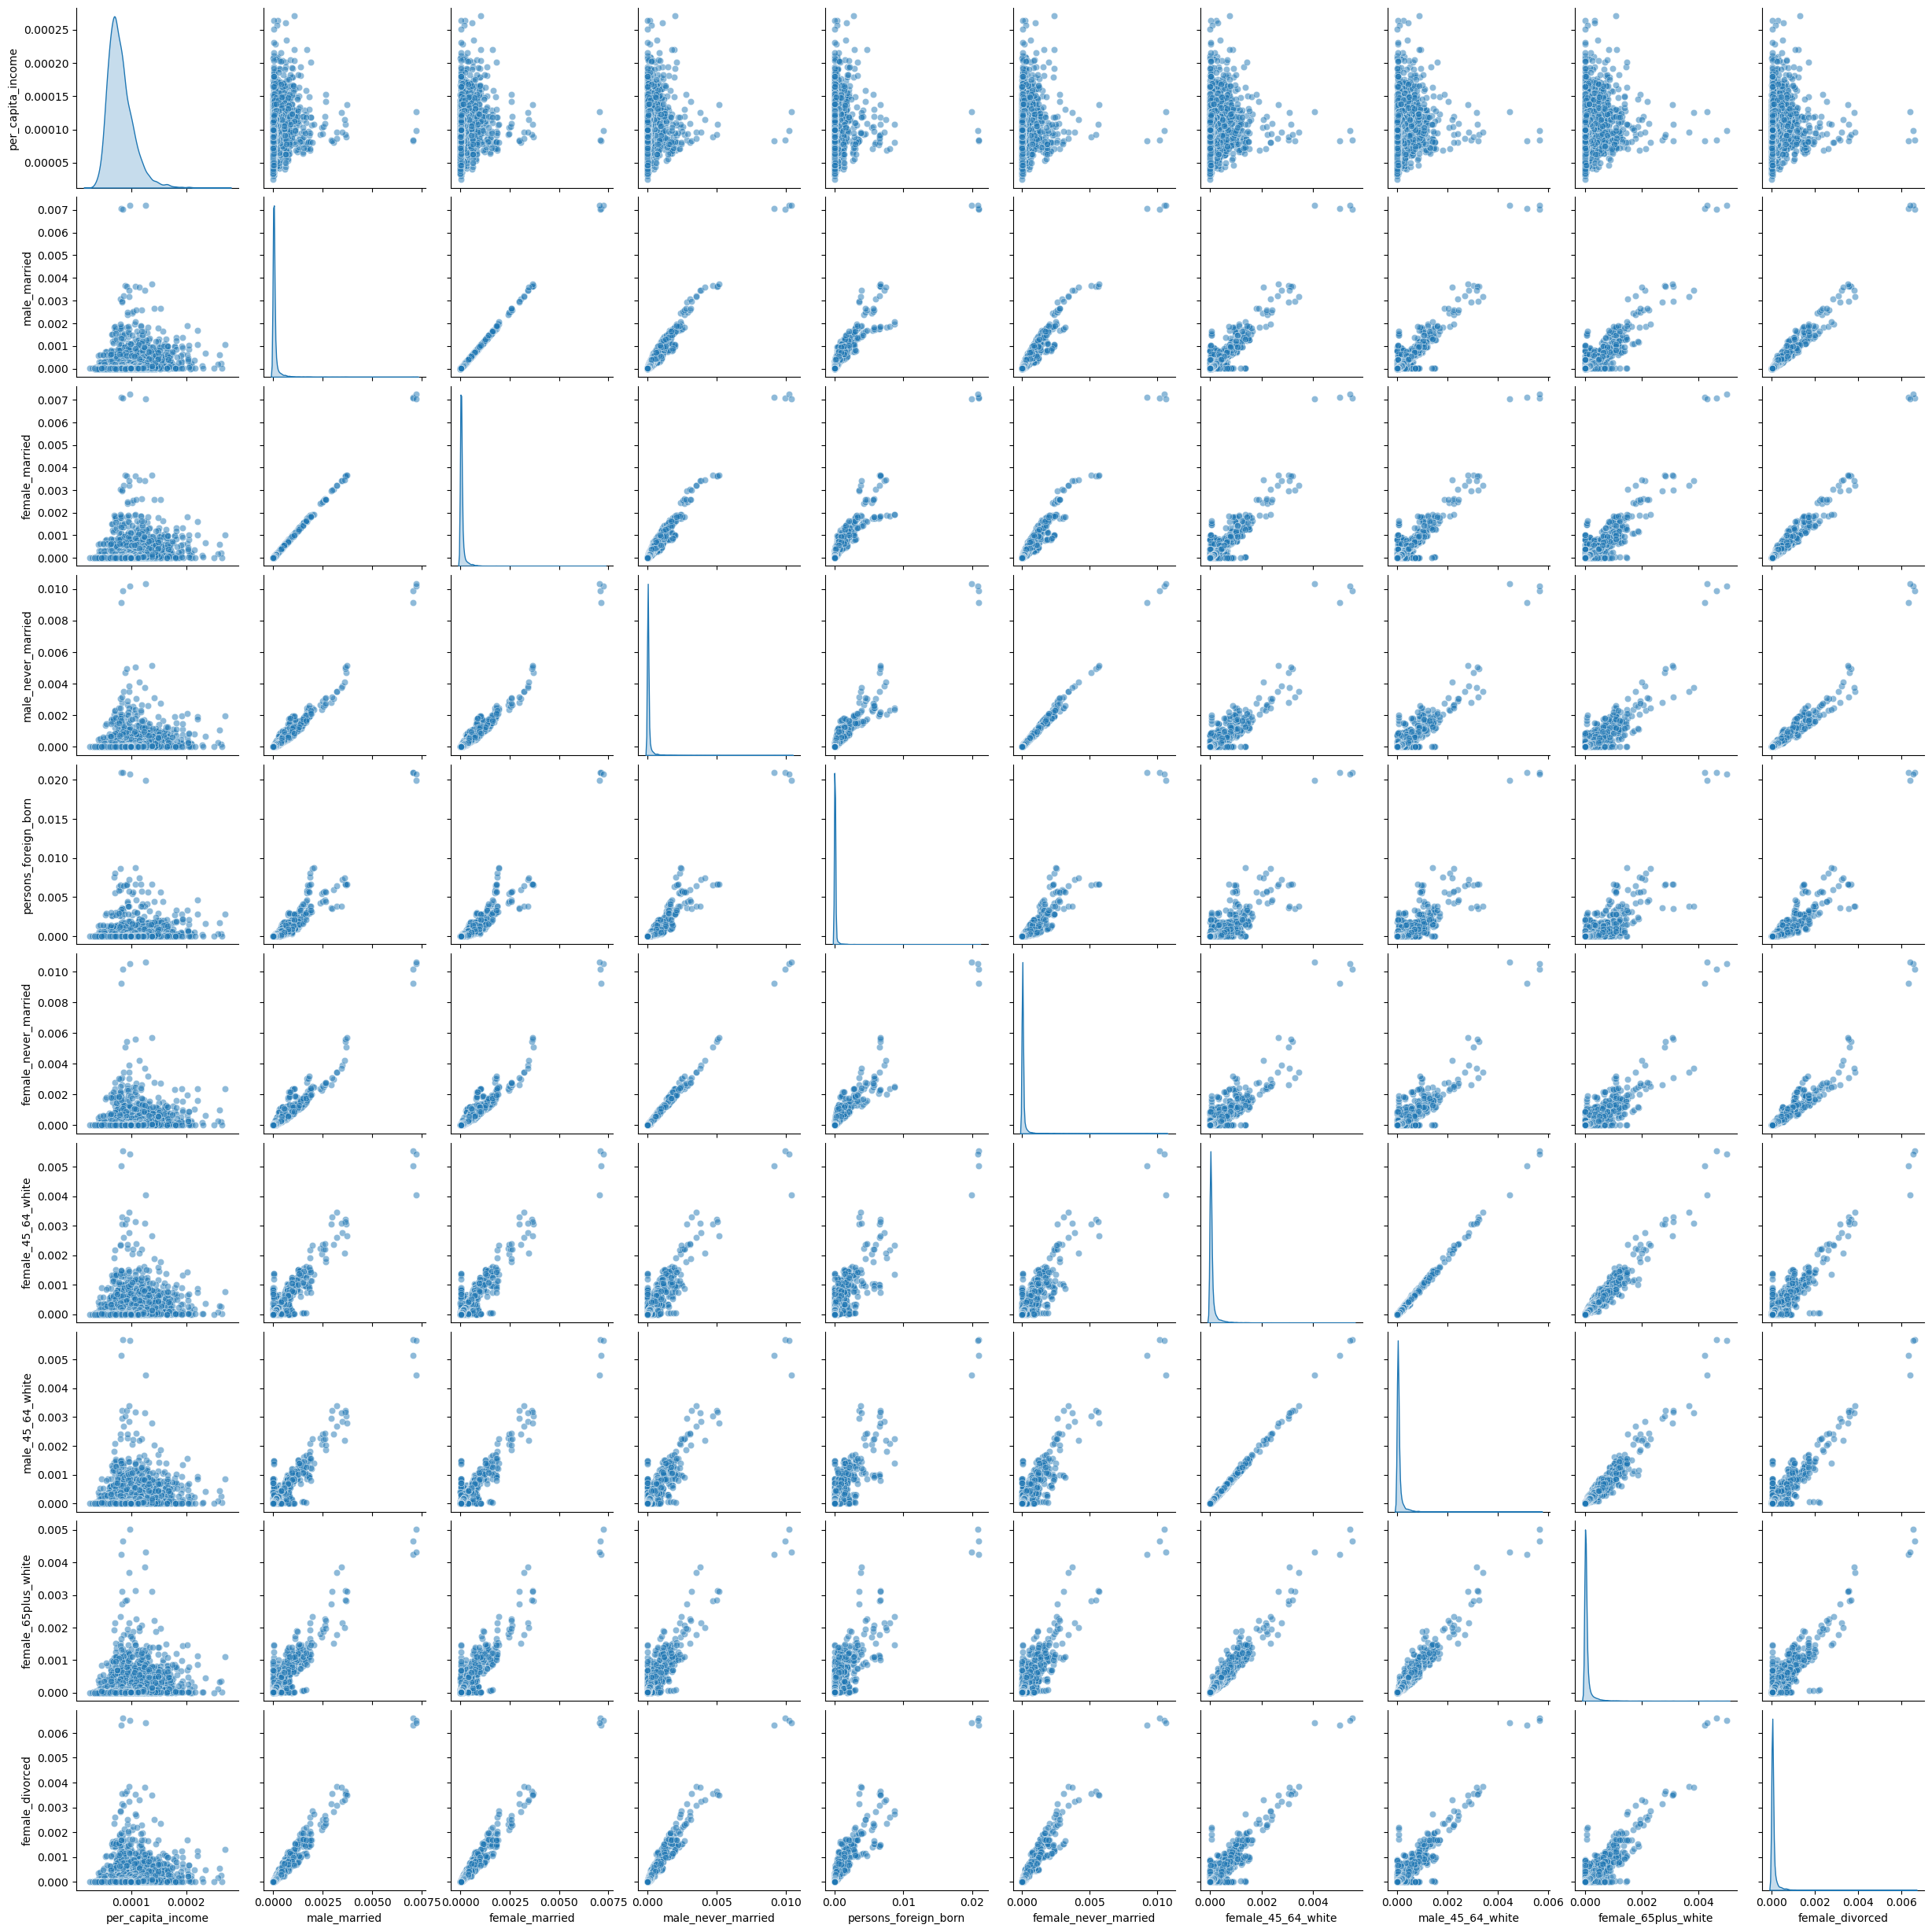

In [75]:
sns.pairplot(df_top_50[second_10], diag_kind='kde', plot_kws={'alpha': 0.5})
plt.show()

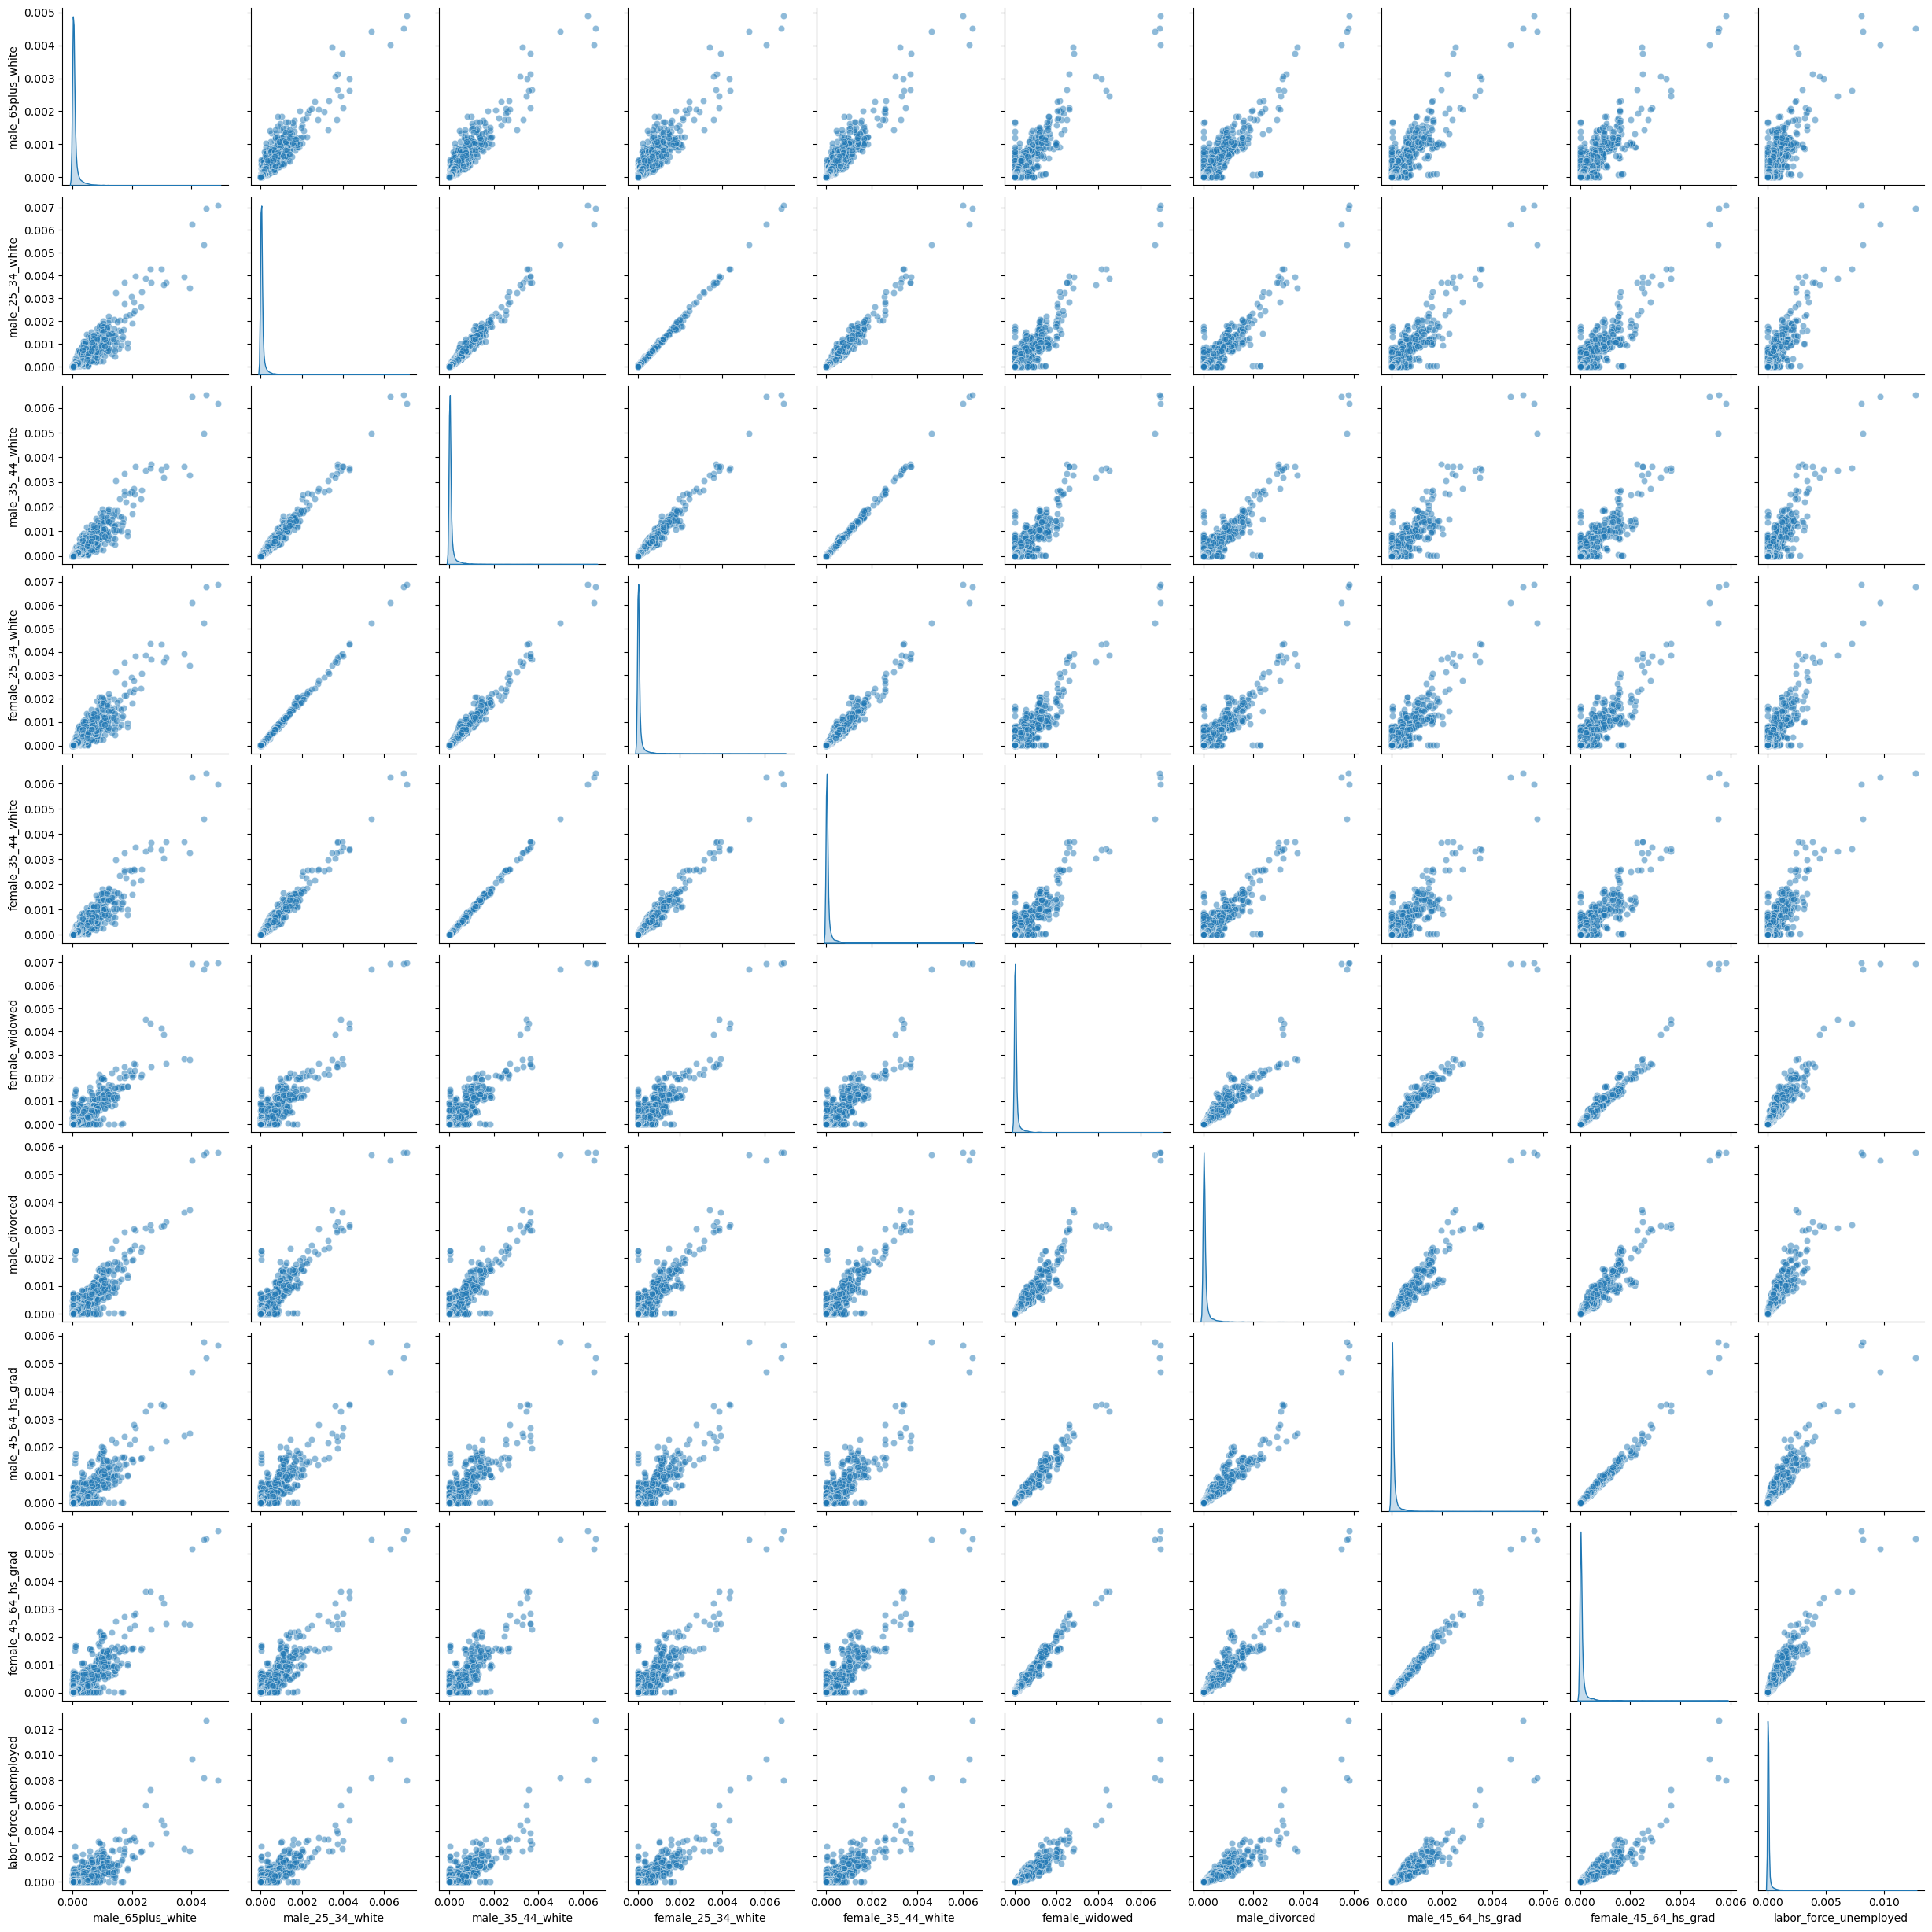

In [76]:
sns.pairplot(df_top_50[third_10], diag_kind='kde', plot_kws={'alpha': 0.5})
plt.show()

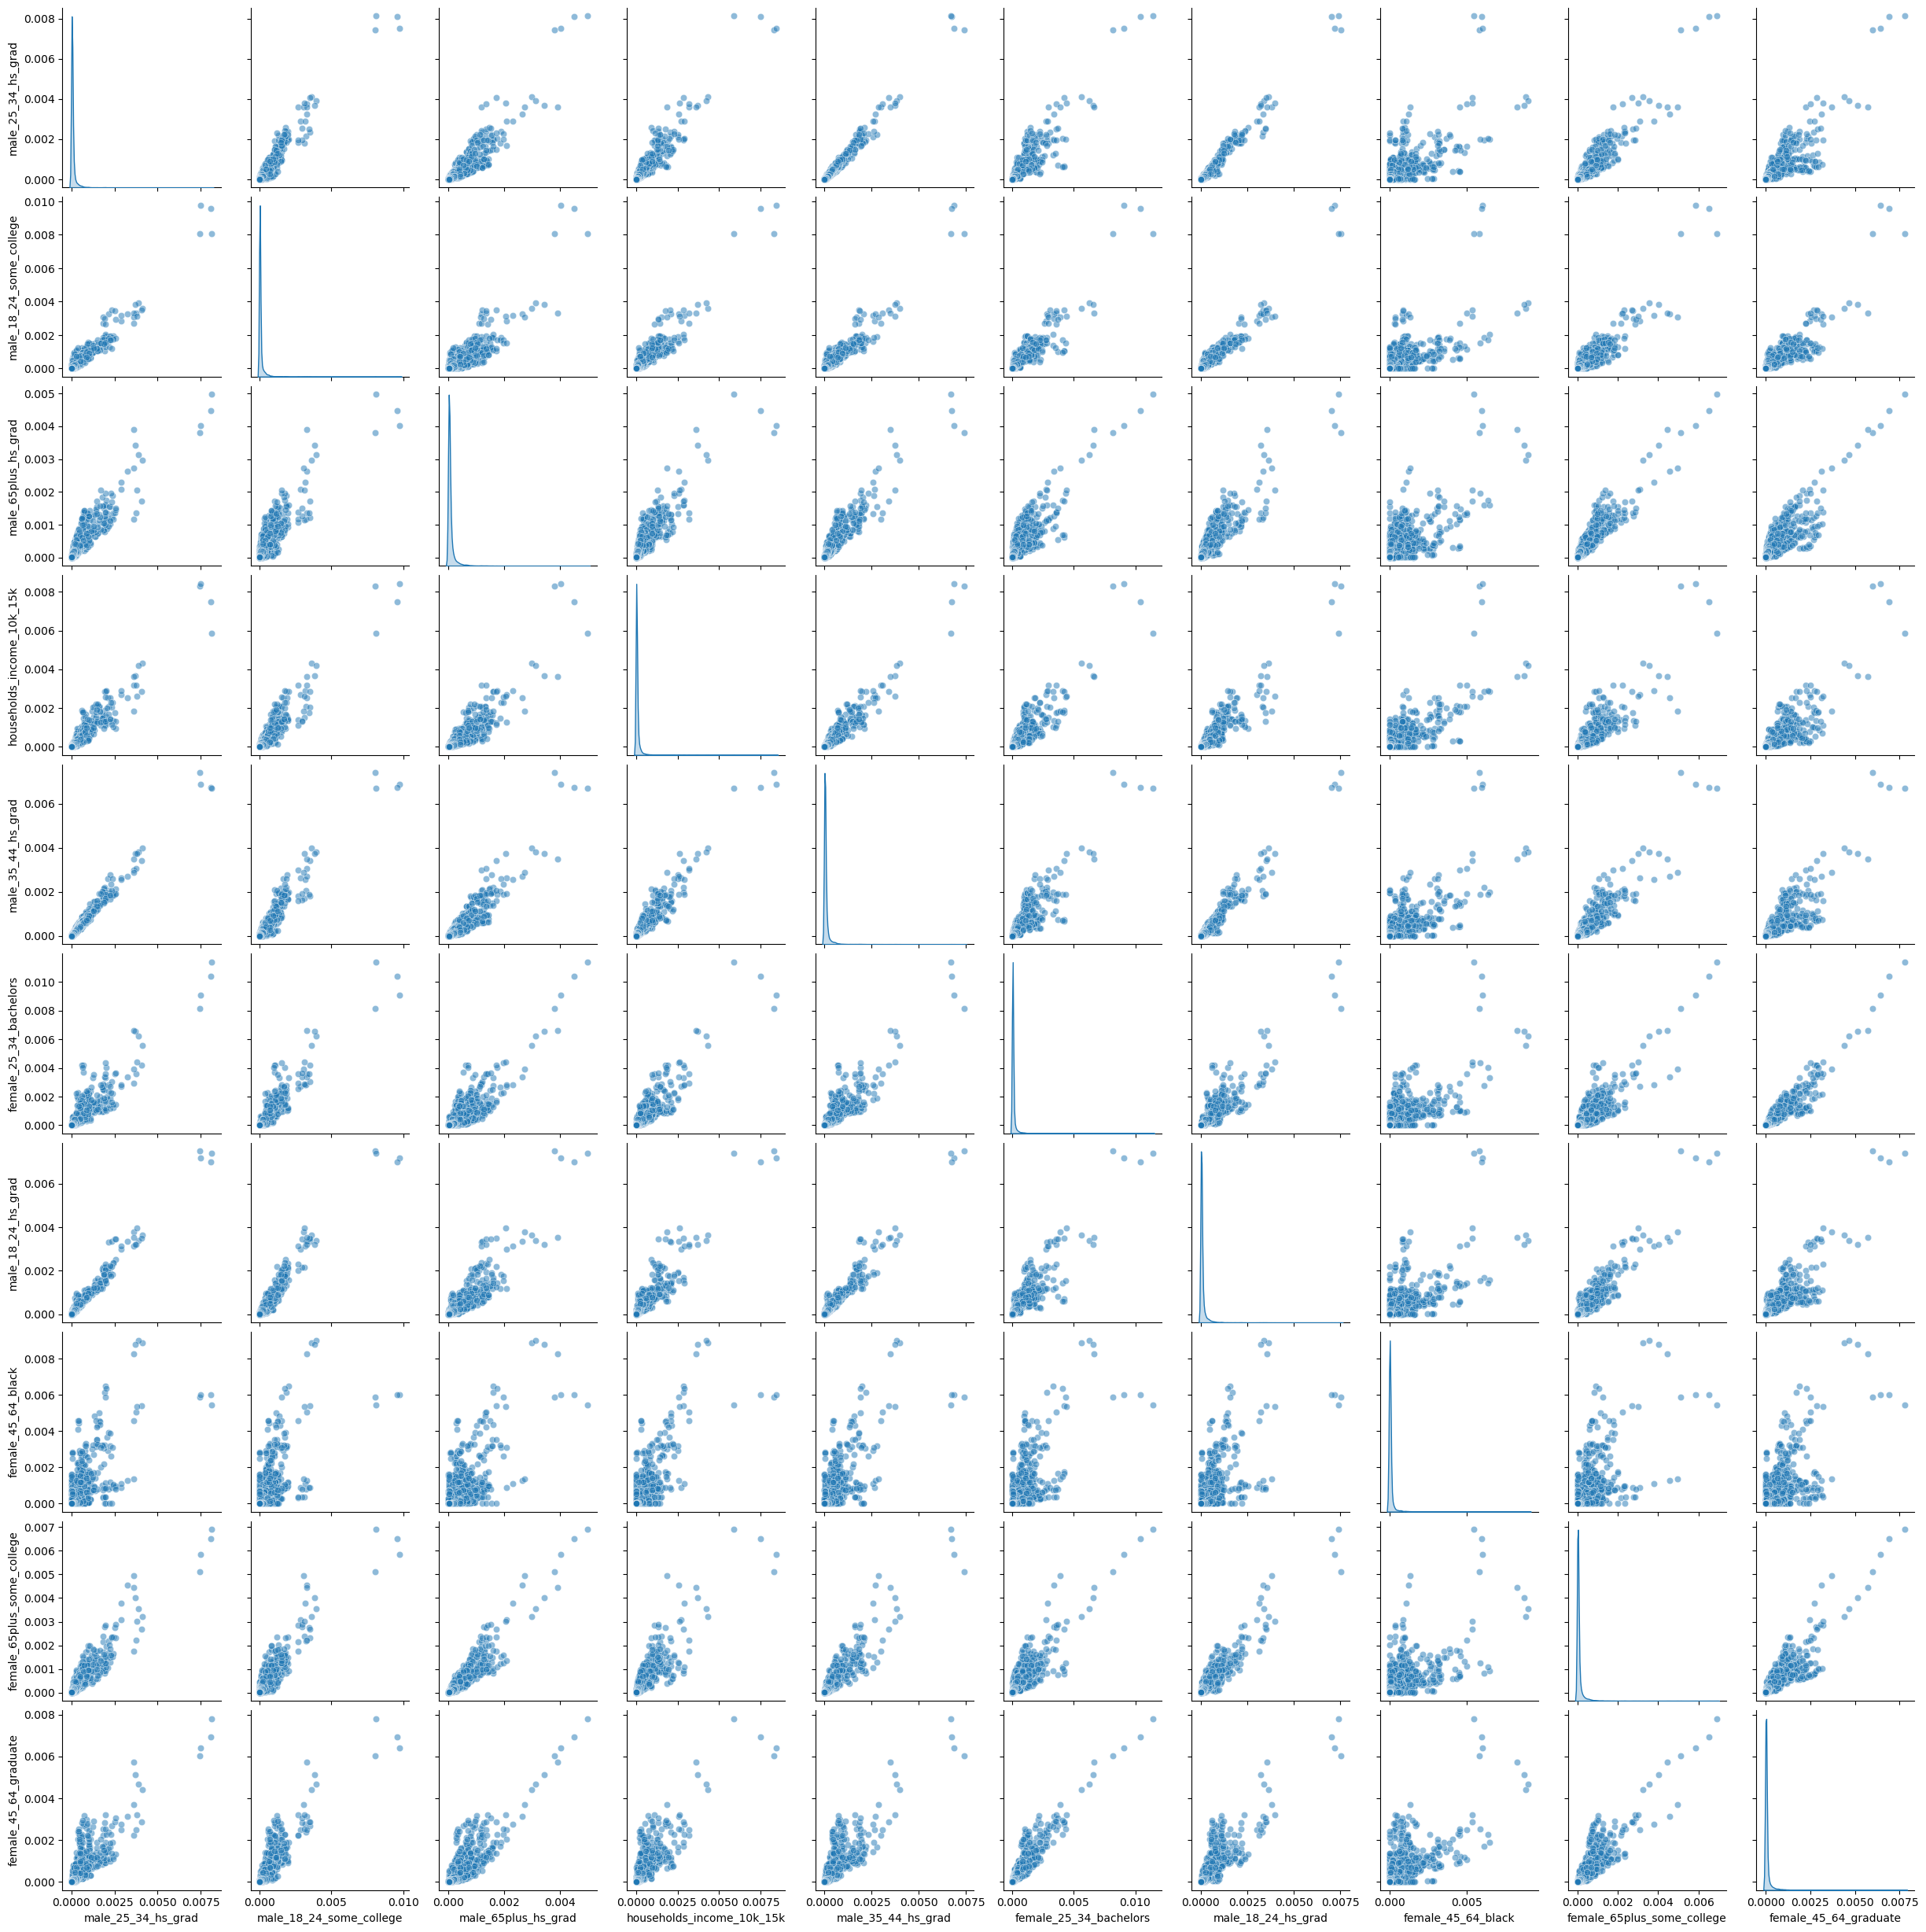

In [59]:
sns.pairplot(df_top_50[fifth_10], diag_kind='kde', plot_kws={'alpha': 0.5})
plt.show()

In [78]:
df["male_18_24_some_college"].describe()


count     12412.000000
mean       1833.621415
std        6140.890832
min           0.000000
25%         106.000000
50%         309.500000
75%        1077.250000
max      222460.000000
Name: male_18_24_some_college, dtype: float64

In [79]:
# county ID with the maximum number of people with some college education and the number of voters
max_idx = df["male_18_24_some_college"].idxmax()
max_value = df["male_18_24_some_college"].max()
max_county = df.iloc[max_idx]
print(f"County ID: {max_county['county']}")
print(f"Some college education: {max_value}")


County ID: Los Angeles County
Some college education: 222460


In [80]:
# example of how to get statistic for chosen columns
df[households].describe()

households_total  households_income_under_10k  \
count      1.241200e+04                 12412.000000   
mean       3.783717e+04                  2426.493555   
std        1.151393e+05                  7575.335389   
min        3.800000e+01                     0.000000   
25%        4.297000e+03                   301.000000   
50%        9.934500e+03                   735.000000   
75%        2.580350e+04                  1795.000000   
max        3.363093e+06                212332.000000   

       households_income_10k_15k  households_income_15k_25k  \
count               12412.000000               12412.000000   
mean                 1812.216323                3563.574605   
std                  5442.253347               10342.980018   
min                     0.000000                   0.000000   
25%                   271.000000                 526.750000   
50%                   626.000000                1193.000000   
75%                  1436.000000                2792.250000   
max                189719.000000              345315.000000   

       households_income_25k_plus  
count                1.241200e+04  
mean                 3.003488e+04  
std                  9.309011e+04  
min                  3.800000e+01  
25%                  3.053750e+03  
50%                  7.255500e+03  
75%                  1.957225e+04  
max                  2.846712e+06

In [81]:
households2 = [ 'households_income_under_10k',
 'households_income_10k_15k',
 'households_income_15k_25k',
 'households_income_25k_plus'] # leaving out households_total

# normalize househoulds 2 by total households
df[households2] = df[households2].div(df['households_total'], axis=0)

df[households]

households_total  households_income_under_10k  \
0                 19718                     0.066741   
1                 69476                     0.059675   
2                  9795                     0.173047   
3                  7441                     0.073512   
4                 20605                     0.084543   
...                 ...                          ...   
12407             16335                     0.052158   
12408              9645                     0.018766   
12409              7586                     0.020301   
12410              3414                     0.037493   
12411              2638                     0.078469   

       households_income_10k_15k  households_income_15k_25k  \
0                       0.050512                   0.087433   
1                       0.048261                   0.118775   
2                       0.098418                   0.139867   
3                       0.073512                   0.151458   
4                       0.060180                   0.130114   
...                          ...                        ...   
12407                   0.028344                   0.066728   
12408                   0.020943                   0.058994   
12409                   0.033087                   0.052597   
12410                   0.032220                   0.106913   
12411                   0.056861                   0.053450   

       households_income_25k_plus  
0                        0.795314  
1                        0.773289  
2                        0.588668  
3                        0.701519  
4                        0.725164  
...                           ...  
12407                    0.852770  
12408                    0.901296  
12409                    0.894015  
12410                    0.823374  
12411                    0.811221  

[12412 rows x 5 columns]

In [82]:
# normalize total_votes of each county by total_votes for the year
df['county_vote_share'] = df['total_votes'] / df.groupby(['year'])['total_votes'].transform('sum')

# check that the sum of county_vote_share is 1 for each year
df.groupby(['year'])['county_vote_share'].sum()

year
2008    1.0
2012    1.0
2016    1.0
2020    1.0
Name: county_vote_share, dtype: float64

In [83]:
# create a population density column
df['population_density'] = df['persons_total'] / df['land_area_sqkm']

# create a persons_per_household column
df['persons_per_household'] = df['persons_total'] / df['households_total']

In [84]:
#normalize the democrat, republican, and other columns by total_votes
df['democrat_prob'] = df['democrat'] / df['total_votes']
df['republican_prob'] = df['republican'] / df['total_votes']
df['other_prob'] = df['other'] / df['total_votes']

In [85]:
df[['democrat_prob', 'republican_prob', 'other_prob']]

democrat_prob  republican_prob  other_prob
0           0.257730         0.736136    0.006133
1           0.238119         0.752595    0.009286
2           0.489854         0.504385    0.005761
3           0.265965         0.724433    0.009602
4           0.145135         0.840195    0.014670
...              ...              ...         ...
12407       0.228950         0.732363    0.038687
12408       0.665990         0.293569    0.040441
12409       0.168200         0.792473    0.039328
12410       0.161458         0.804812    0.033730
12411       0.101124         0.872753    0.026124

[12412 rows x 3 columns]

In [86]:
# normalize the sexes columns by persons_total
df[sexes] = df[sexes].div(df['persons_total'], axis=0)
df[sexes]

persons_male  persons_female
0          0.484997        0.515003
1          0.488660        0.511340
2          0.528972        0.471028
3          0.537904        0.462096
4          0.495308        0.504692
...             ...             ...
12407      0.517907        0.482093
12408      0.518890        0.481110
12409      0.508420        0.491580
12410      0.523625        0.476375
12411      0.541194        0.458806

[12412 rows x 2 columns]

In [87]:
sexes = ['male','female']
ages = ['18_24', 
        '25_34', 
        '35_44', 
        '45_64', 
        '65_plus']
edus = ['less_than_9th', 
        'some_hs', 
        'hs_grad', 
        'some_college', 
        'associates', 
        'bachelors', 
        'graduate']
races = ['black',
         'white',
         'aian',
         'asian',
         'nhpi',
         'multi',
         'other']

In [88]:
#let's compute a sex by race breakdown (age over 18) for each county by summing up the sex ~ age ~ race columns over the ages
for sex in sexes:
    for race in races:
        #create the name for the new sex ~ race column
        col_name = f'{sex}_{race}'

        #get a list of columns that begin with sex and end with race
        cols = [col for col in df.columns if col.startswith(sex) and col.endswith(race)]
        # print(cols)

        #sum the columns over the ages
        df[col_name] = df[cols].sum(axis=1)

# check that the new columns are correct
sex_race = [col for col in df.columns if any(col == f'{sex}_{race}' for sex in sexes for race in races)]
df[sex_race]

male_black  male_white  male_aian  male_asian  male_nhpi  male_multi  \
0            2929       14777         52          98          0         155   
1            5594       55647        382         315          0         674   
2            4960        6004         61          14          0         166   
3            1494        7613         19          36          0          22   
4             244       19720         59          71          0         183   
...           ...         ...        ...         ...        ...         ...   
12407         158       13924        175         128         46         981   
12408         120        8598          0          83         16         325   
12409          25        6723         43          32          0         458   
12410           1        2549         25           0          0         291   
12411           6        2577         98          16          0         148   

       male_other  female_black  female_white  female_aian  female_asian  \
0             151          3512         15592           97           164   
1            1378          6042         59731          417           512   
2             193          4301          4981           26            32   
3               0          1265          6691           21             0   
4             312           326         20373          126            72   
...           ...           ...           ...          ...           ...   
12407         707           185         12841          136           154   
12408         792            18          7595           28           207   
12409         135             4          6545            0             1   
12410         139             0          2430           31            30   
12411          28             0          2145           60             0   

       female_nhpi  female_multi  female_other  
0                0           256            66  
1                6           687           596  
2                3            87           154  
3                0             0             0  
4                0           189           306  
...            ...           ...           ...  
12407            2           988           444  
12408            0           393           848  
12409            0           425           159  
12410            0           255            83  
12411           48           227             0  

[12412 rows x 14 columns]

In [89]:
#make one dataframe for each year, put them in a dictionary with year as key
dfs = {}
dfs['2008'] = df[df['year'] == 2008]
dfs['2012'] = df[df['year'] == 2012]
dfs['2016'] = df[df['year'] == 2016]
dfs['2020'] = df[df['year'] == 2020]

In [90]:
dfs['2008'].shape, dfs['2012'].shape, dfs['2016'].shape, dfs['2020'].shape

((3103, 199), (3103, 199), (3103, 199), (3103, 199))